# Validation of DWX model

Document to validate the DWX model as presented in the paper by [Deng et al. 2009](https://www.sciencedirect.com/science/article/pii/S0017931000001319#BIB16).

In [441]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [442]:
Re=180
Pr = 0.71
yplus = np.logspace(-1,3)
viscous = Pr*yplus
loglayer = 2.78*np.log(yplus)+1.9

In [452]:
#read the field
df_matl = pd.read_csv('validation_data/matlab_code/DengValidation_Matlab4.txt',sep=',')
df_num = pd.read_fwf('../channel/Inflow_Abe_DWX_mod0_cprop_00180.csv',widths=21*[20]) 

# df_field = pd.read_fwf('../laminarbl.csv',widths=30*[20]) #the complete fi?eld
# df_num = df_field[df_field['x']==df_field['x'].unique()[25]]
# df_num = df_num.iloc[1:]
df_num['ttau'] = 2/(Re*Pr)
df_num['tplus'] = df_num['T']/df_num['ttau']
df_num['tau_u'] = df_num['k']/df_num['eps']*(Re)
df_num['tau_t'] = df_num['kt']/(2*df_num['epst'])*(Re)
df_num['ratio'] = df_num['tau_t']/df_num['tau_u']
df_num['kt_scaled'] = np.sqrt(df_num['kt'])/df_num['ttau']
df_num['eps_scaled'] = df_num['epst']/((df_num['ttau']**2))*(1/Re)
df_num['y_'] = df_num['y']

#read the validation data
df_val_tplus = pd.read_csv("validation_data/Deng(2001)_Tplus.csv",
                           sep='\t',header=None,names=['yplus','Tplus'])
df_val_kt    = pd.read_csv("validation_data/Deng(2001)_kt.csv", 
                           sep='\t',header=None,names=['yplus','kt']   )
df_val_eps   = pd.read_csv("validation_data/Deng(2001)_epst.csv", 
                           sep='\t',header=None,names=['yplus','epst'] )
df_val_tauu  = pd.read_csv("validation_data/Deng(2001)_tauu.csv", 
                           sep='\t',header=None,names=['yplus','tauu'] )
df_val_taut  = pd.read_csv("validation_data/Deng(2001)_taut.csv", 
                           sep='\t',header=None,names=['yplus','taut'] )
df_val_ratio = pd.read_csv("validation_data/Deng(2001)_ratio.csv", 
                           sep='\t',header=None,names=['yplus','ratio'])

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1001: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:3097: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  self.set_xlim(lower, upper, auto=None)


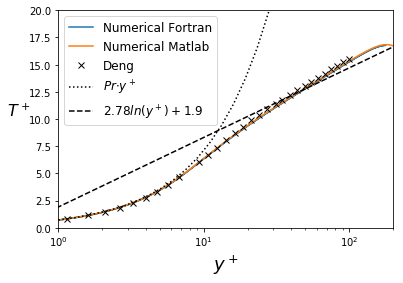

In [453]:
fig, ax = plt.subplots()
ax.set_xscale("log")
df_num.plot('yp', 'tplus',ax=ax, 
            label='Numerical Fortran')

df_matl.plot('yplus', 'Tplus',ax=ax, 
            label='Numerical Matlab')
df_val_tplus.plot('yplus', 'Tplus',ax=ax, 
            label="Deng", linestyle="None", marker='x', color='k')
ax.plot(yplus,viscous, linestyle=':', color='k', label=r'$Pr{\cdot}y^+$')
ax.plot(yplus,loglayer, linestyle = '--', color='k', label=r'$2.78ln(y^+)+1.9$')
ax.set_xbound(1,200)
ax.set_ybound(0,20)
ax.set_xbound(0,200)
ax.set_xlabel(r"$y^+$", fontsize=18)
ax.set_ylabel(r"$T^+$",rotation=0, labelpad=10, fontsize=16)
ax.legend(prop={'size': 12})

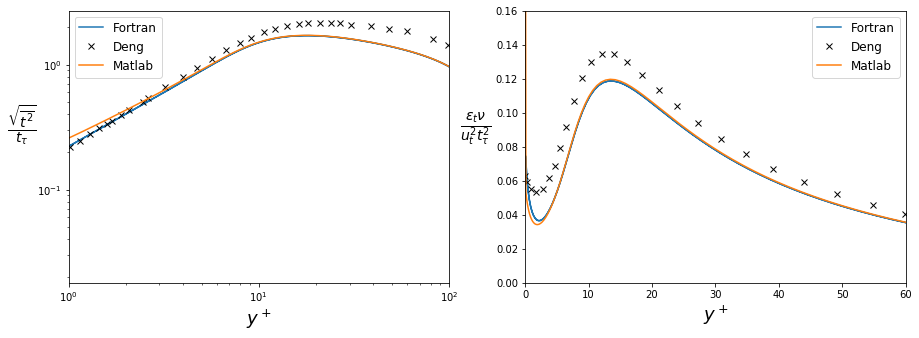

In [454]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
df_num.plot('yp', 'kt_scaled',ax=ax1, label='Fortran')
df_val_kt.plot("yplus", "kt",ax=ax1, marker='x', 
               linestyle="None", color='k', label='Deng')
df_num.plot('yp', 'eps_scaled',ax=ax2, label='Fortran')
df_matl.plot('yplus', 'kt_scaled',ax=ax1, label='Matlab')

df_val_eps.plot('yplus', 'epst',ax=ax2, 
                marker='x', linestyle="None", color='k', label='Deng')
df_matl.plot('yplus', 'eps_scaled',ax=ax2, label='Matlab')

ax1.set_xscale("log")
ax1.set_yscale('log')
# ax1.set_ybound(0.1,10)
ax1.set_xbound(1,100)
ax1.set_xlabel(r"$y^+$", fontsize=18)
ax1.set_ylabel(r"$\frac{\sqrt{\overline{t^2}}}{t_{\tau}}$", 
              rotation=0, fontsize=20, labelpad=15)
ax1.legend(prop={'size': 12})

ax2.set_ybound(0,0.16)
ax2.set_xbound(0,60)
ax2.set_xlabel(r"$y^+$", fontsize=18)
ax2.set_ylabel(r"$\frac{\epsilon_t \nu}{u_t^2 t_{\tau}^2}$", 
              rotation=0, fontsize=20, labelpad=20)
ax2.legend(prop={'size': 12})


In [455]:
df_matl.columns

Index(['yplus', 'y', 'uplus', 'k', 'mut', 'eps', 'kt', 'epst', 'eps_scaled',
       'kt_scaled', 'tau_u', 'tau_t', 'Tplus'],
      dtype='object')

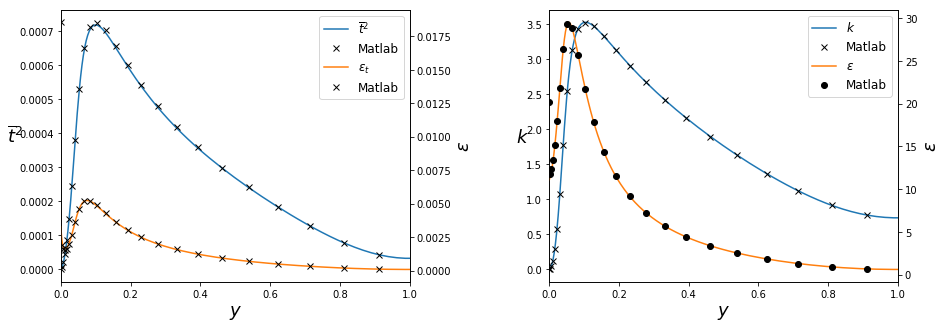

In [457]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
fig, (ax1,ax11) = plt.subplots(1,2, figsize=(15,5))
fig.subplots_adjust(wspace=.4)
#ax1.set
ax2 = ax1.twinx()

df_num.plot("y_","kt",ax=ax1, label=r'$\overline{t}^2$')
df_matl[::4].plot('y', 'kt',ax=ax1, label='Matlab', marker='x', color='k', linestyle="None")


df_num.plot("y_","epst",ax=ax2, color=colors[1], label=r'$\epsilon_t$')
df_matl[::4].plot('y', 'epst',ax=ax2, label='Matlab', marker='x', color='k', linestyle="None")
ax1.set_xbound(0,1)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.get_legend().remove()
ax1.legend(lines + lines2, labels + labels2, loc=0,prop={'size': 12})
ax1.set_xlabel(r'$y$', fontsize=18)
ax1.set_ylabel(r'$\overline{t}^2$', fontsize=18, rotation=0)
ax2.set_ylabel(r'$\epsilon$', fontsize=18)
fig.gca().ticklabel_format(style='scientific',axis='y')

ax21 = ax11.twinx()
df_num.plot('y', 'k',ax=ax11, label=r'$k$')
df_matl[::4].plot('y', 'k',ax=ax11, label='Matlab', marker='x', color='k', linestyle="None")
# df_num.plot('y', 'eps',ax=ax2, color=colors[1])
df_num.plot('y', 'eps',ax=ax21, color=colors[1], label=r'$\epsilon$')
df_matl[::4].plot('y', 'eps',ax=ax21, label='Matlab', marker='o', color='k', linestyle="None")

lines, labels = ax11.get_legend_handles_labels()
lines2, labels2 = ax21.get_legend_handles_labels()
ax21.get_legend().remove()
ax11.legend(lines + lines2, labels + labels2, loc=0,prop={'size': 12})
ax11.set_xlabel(r'$y$', fontsize=18)
ax11.set_ylabel(r'$k$', fontsize=18, rotation=0)
ax21.set_ylabel(r'$\epsilon$', fontsize=18)
ax11.set_xbound(0,1)


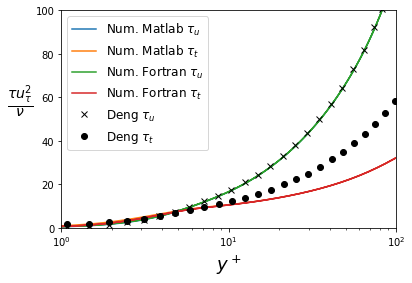

In [458]:
fig, ax = plt.subplots()
df_matl.plot('yplus', 'tau_u',ax=ax, label="Num. Matlab "+r'$\tau_u$')
df_matl.plot('yplus', 'tau_t',ax=ax, label="Num. Matlab "+r'$\tau_t$')
df_num.plot('yp', 'tau_u',ax=ax, label="Num. Fortran "+r'$\tau_u$')
df_num.plot('yp', 'tau_t',ax=ax, label="Num. Fortran "+r'$\tau_t$')
df_val_tauu.plot('yplus', 'tauu',
                 
                 ax=ax, marker='x', label="Deng "+r'$\tau_u$',
                 linestyle="None", color='k')
df_val_taut.plot('yplus', 'taut',
                 ax=ax, marker='o', label="Deng "+r'$\tau_t$',
                 linestyle="None", color='k')


ax.set_xlabel("$y^+$", fontsize=18)
ax.set_ylabel(r"$\frac{\tau u_{\tau}^2}{\nu}$", 
              fontsize=20, rotation=0, labelpad=15)
ax.set_xscale("log")
ax.set_xbound(1,100)
ax.set_ybound(0,100)
ax.legend(prop={'size': 12})